In [1]:
import pandas as pd
infile='/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/tieredApproach/Epcam_blue/TowardsnonoverfitSM/data_reqfield_hg38_sorted_rolled_sorted_mergedonlyoverlapping_othersblue_all_matrix_intwith_allcandidate_towardsSM_dummy_mean_SM_top1000_pos.txt'
indf=pd.read_csv(infile,sep='\t',index_col=['chrom','start','end'])
celltype='EPCAM-others'
assumedother_meth=.98 ############
maxmethylation_threshold=0.3 ###################
total_compartments=['chrom','start','NaiveCD4-others','NaiveCD8-others','nB-others','NK-others','PC-others','Mono-others','M0-others','M1-others','M2-others','iDC-others','mDC-others','PMN-others','cm8-others','em8-others','Eo-others','Tregs-others','em4-others','ed8-others','Mg-others','cm4-others','Er-others','mB-others','EPCAM-others']
total_compartments_set=set(total_compartments)
finalcompartmentshouldbe=len(total_compartments)
indf.head()

GSM4928782_PDAC1-Ep.bed  GSM4928783_PDAC2-Ep.bed  \
chrom start    end                                                          
chr1  1715610  1715612                      0.70                   0.3665   
      11225710 11225712                     1.00                   1.0000   
      12130653 12130655                     0.75                   0.8690   
      12282656 12282658                     1.00                   0.9160   
      12289371 12289373                     1.00                   0.8330   

                         GSM4928784_PDAC3-Ep.bed  GSM4928785_PDAC4-Ep.bed  \
chrom start    end                                                          
chr1  1715610  1715612                       0.2                   0.5645   
      11225710 11225712                      1.0                   0.7500   
      12130653 12130655                      1.0                   0.8660   
      12282656 12282658                      1.0                   0.8120   
      12289371 12289373                      1.0                   0.8750   

                         GSM4928786_PDAC5-Ep.bed  GSM4928787_PDAC6-Ep.bed  \
chrom start    end                                                          
chr1  1715610  1715612                    0.5945                    0.557   
      11225710 11225712                   0.8180                    0.937   
      12130653 12130655                   0.9330                    0.916   
      12282656 12282658                   0.8330                    1.000   
      12289371 12289373                   0.8820                    0.800   

                         GSM4928788_PDAC7-Ep.bed  F-1393-T-EpCam  \
chrom start    end                                                 
chr1  1715610  1715612                     0.833           0.857   
      11225710 11225712                    0.857           1.000   
      12130653 12130655                    1.000           0.769   
      12282656 12282658                    1.000           0.859   
      12289371 12289373                    1.000           0.946   

                         F-1697-T-EpCam  Epcam-Tumor-1313  Epcam-Tumor-1382  \
chrom start    end                                                            
chr1  1715610  1715612             0.33               NaN               0.0   
      11225710 11225712            1.00               NaN               0.0   
      12130653 12130655            1.00               0.0               NaN   
      12282656 12282658            1.00               0.0               NaN   
      12289371 12289373            1.00               0.0               NaN   

                         Epcam-Tumor-1389  
chrom start    end                         
chr1  1715610  1715612                0.0  
      11225710 11225712               0.0  
      12130653 12130655               0.0  
      12282656 12282658               0.0  
      12289371 12289373               0.0

In [2]:
indf['maxvalue']=indf.max(axis=1)
indf['meanvalue']=indf.mean(axis=1)
indf.head()

GSM4928782_PDAC1-Ep.bed  GSM4928783_PDAC2-Ep.bed  \
chrom start    end                                                          
chr1  1715610  1715612                      0.70                   0.3665   
      11225710 11225712                     1.00                   1.0000   
      12130653 12130655                     0.75                   0.8690   
      12282656 12282658                     1.00                   0.9160   
      12289371 12289373                     1.00                   0.8330   

                         GSM4928784_PDAC3-Ep.bed  GSM4928785_PDAC4-Ep.bed  \
chrom start    end                                                          
chr1  1715610  1715612                       0.2                   0.5645   
      11225710 11225712                      1.0                   0.7500   
      12130653 12130655                      1.0                   0.8660   
      12282656 12282658                      1.0                   0.8120   
      12289371 12289373                      1.0                   0.8750   

                         GSM4928786_PDAC5-Ep.bed  GSM4928787_PDAC6-Ep.bed  \
chrom start    end                                                          
chr1  1715610  1715612                    0.5945                    0.557   
      11225710 11225712                   0.8180                    0.937   
      12130653 12130655                   0.9330                    0.916   
      12282656 12282658                   0.8330                    1.000   
      12289371 12289373                   0.8820                    0.800   

                         GSM4928788_PDAC7-Ep.bed  F-1393-T-EpCam  \
chrom start    end                                                 
chr1  1715610  1715612                     0.833           0.857   
      11225710 11225712                    0.857           1.000   
      12130653 12130655                    1.000           0.769   
      12282656 12282658                    1.000           0.859   
      12289371 12289373                    1.000           0.946   

                         F-1697-T-EpCam  Epcam-Tumor-1313  Epcam-Tumor-1382  \
chrom start    end                                                            
chr1  1715610  1715612             0.33               NaN               0.0   
      11225710 11225712            1.00               NaN               0.0   
      12130653 12130655            1.00               0.0               NaN   
      12282656 12282658            1.00               0.0               NaN   
      12289371 12289373            1.00               0.0               NaN   

                         Epcam-Tumor-1389  maxvalue  meanvalue  
chrom start    end                                              
chr1  1715610  1715612                0.0     0.857   0.488292  
      11225710 11225712               0.0     1.000   0.780167  
      12130653 12130655               0.0     1.000   0.758583  
      12282656 12282658               0.0     1.000   0.785000  
      12289371 12289373               0.0     1.000   0.778000

In [3]:
indf.sort_values(by=['maxvalue'])

GSM4928782_PDAC1-Ep.bed  GSM4928783_PDAC2-Ep.bed  \
chrom start     end                                                           
chr7  99098969  99098971                     0.000                    0.052   
chr12 31103859  31103861                     0.000                    0.000   
chr19 10749425  10749427                     0.000                    0.058   
chr20 20548870  20548872                     0.000                    0.055   
chr17 62671731  62671733                     0.055                    0.000   
...                                            ...                      ...   
chr16 87400899  87400901                     0.875                    0.888   
      88897225  88897227                     0.933                    1.000   
      88951193  88951195                     0.894                    1.000   
      30496371  30496373                     0.857                    0.888   
chrX  151563043 151563045                    0.909                    1.000   

                           GSM4928784_PDAC3-Ep.bed  GSM4928785_PDAC4-Ep.bed  \
chrom start     end                                                           
chr7  99098969  99098971                     0.000                    0.000   
chr12 31103859  31103861                     0.000                    0.000   
chr19 10749425  10749427                     0.000                    0.000   
chr20 20548870  20548872                     0.000                    0.000   
chr17 62671731  62671733                     0.142                    0.000   
...                                            ...                      ...   
chr16 87400899  87400901                     0.909                    0.833   
      88897225  88897227                     0.826                    1.000   
      88951193  88951195                     0.600                    1.000   
      30496371  30496373                     1.000                    0.875   
chrX  151563043 151563045                    0.875                    0.750   

                           GSM4928786_PDAC5-Ep.bed  GSM4928787_PDAC6-Ep.bed  \
chrom start     end                                                           
chr7  99098969  99098971                     0.000                     0.00   
chr12 31103859  31103861                     0.000                     0.00   
chr19 10749425  10749427                     0.076                     0.00   
chr20 20548870  20548872                     0.000                     0.00   
chr17 62671731  62671733                     0.000                     0.00   
...                                            ...                      ...   
chr16 87400899  87400901                     0.857                     1.00   
      88897225  88897227                     0.466                     1.00   
      88951193  88951195                     0.769                     1.00   
      30496371  30496373                     0.571                     0.75   
chrX  151563043 151563045                    1.000                     1.00   

                           GSM4928788_PDAC7-Ep.bed  F-1393-T-EpCam  \
chrom start     end                                                  
chr7  99098969  99098971                     0.000           0.055   
chr12 31103859  31103861                     0.000           0.299   
chr19 10749425  10749427                     0.000           0.256   
chr20 20548870  20548872                     0.000           0.253   
chr17 62671731  62671733                     0.000           0.321   
...                                            ...             ...   
chr16 87400899  87400901                     1.000           1.000   
      88897225  88897227                     0.833           0.929   
      88951193  88951195                     1.000           0.667   
      30496371  30496373                     0.857           0.934   
chrX  151563043 151563045                    0.600           0.902   

                           F-169

In [4]:
sortedindf=indf.sort_values(by=['meanvalue'])

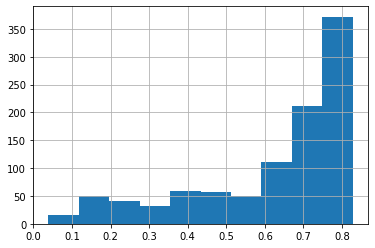

In [5]:
hist =indf['meanvalue'].hist()

In [6]:
outdf=indf[indf['meanvalue']<=maxmethylation_threshold].copy()

In [7]:
outdf[celltype]=outdf['meanvalue'].mean()-assumedother_meth

In [8]:
outdf=outdf[[celltype]]
outdf.reset_index(inplace=True)
outdf.head()

,chrom,start,end,EPCAM-others
0,chr1,19287649,19287651,-0.787255
1,chr1,52869286,52869288,-0.787255
2,chr1,61184054,61184056,-0.787255
3,chr1,150668192,150668194,-0.787255
4,chr1,151541880,151541882,-0.787255


In [9]:
outdfcolumns=set(outdf.columns.tolist())
missingcols=total_compartments_set-outdfcolumns
missingcolslist=list(missingcols)
missingcolslist
for micol in missingcolslist:
    outdf[micol]=0.9

In [10]:
outdf=outdf.drop(['end'], axis=1)
if outdf.shape[1]!=finalcompartmentshouldbe:
   # print(infile)
    print("error. Exiting")
    sys.exit(1)

In [11]:
outdf=outdf[total_compartments]

In [12]:
outdf.head()

,chrom,start,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,...,em8-others,Eo-others,Tregs-others,em4-others,ed8-others,Mg-others,cm4-others,Er-others,mB-others,EPCAM-others
0,chr1,19287649,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,-0.787255
1,chr1,52869286,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,-0.787255
2,chr1,61184054,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,-0.787255
3,chr1,150668192,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,-0.787255
4,chr1,151541880,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,-0.787255


In [13]:
sortedindf.to_csv(infile+"_meansorted.txt",sep='\t')
outdf.to_csv(infile+'_maxmean_'+str(maxmethylation_threshold)+"_SM.txt",sep='\t',index=False)